<a href="https://colab.research.google.com/github/Eskaykaushik/100ML/blob/main/GDusingReLu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-6e76d20419e8>:57: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y_train * np.log(predicted_output) + (1 - y_train) * np.log(1 - predicted_output))
<ipython-input-2-6e76d20419e8>:57: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y_train * np.log(predicted_output) + (1 - y_train) * np.log(1 - predicted_output))
<ipython-input-2-6e76d20419e8>:57: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(y_train * np.log(predicted_output) + (1 - y_train) * np.log(1 - predicted_output))


Confusion Matrix:
[[ 85   8]
 [100  11]]
Test Accuracy: 47.06%


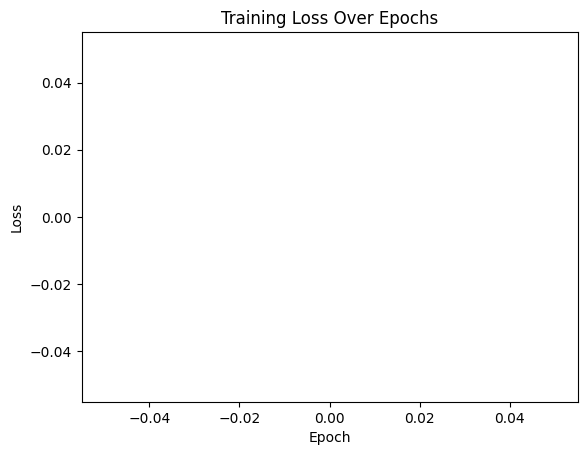

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the dataset
url = "/content/student.csv"  # Replace with the path to your dataset
df = pd.read_csv(url)

# Extract features (X) and target variable (y)
features = ['Age', 'Study Hours', 'Previous Grades', 'Attendance Percentage', 'Test Score', 'Project Score']
X = df[features].values
y = df['Pass'].values.reshape(-1, 1)

# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * X.shape[0])

X_train, X_test = X[:split_index, :], X[split_index:, :]
y_train, y_test = y[:split_index], y[split_index:]

# Neural Network parameters
input_size = X_train.shape[1]
hidden_size = 8
output_size = 1
learning_rate = 0.00001
epochs = 10000

# Initialize weights
np.random.seed(40)
weights_input_hidden = np.random.randn(input_size, hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)

# Sigmoid activation function
def sigmoid(x):
    return np.maximum(0, x)

# Derivative of sigmoid
def sigmoid_derivative(x):
    return np.where(x > 0, 1, 0)

losses = []

# Training the neural network using gradient descent
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X_train, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)

    output_input = np.dot(hidden_output, weights_hidden_output)
    predicted_output = sigmoid(output_input)

   # epsilon = 1e-5  # Small epsilon to avoid division by zero
    loss = -np.mean(y_train * np.log(predicted_output) + (1 - y_train) * np.log(1 - predicted_output))
    losses.append(loss)

    # Backpropagation
    error = y_train - predicted_output

    output_delta = error * sigmoid_derivative(predicted_output)
    hidden_error = np.dot(output_delta, weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    # Update weights using gradient descent
    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += X_train.T.dot(hidden_delta) * learning_rate

# Testing the neural network
hidden_layer = sigmoid(np.dot(X_test, weights_input_hidden))
final_output = sigmoid(np.dot(hidden_layer, weights_hidden_output))

# Threshold the predictions
predictions = (final_output > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Evaluate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()


# New section